# Compose Your Song



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

print(tf.__version__)

2.6.0


## Preparing the data

In [ ]:
lyrics = open('/content/lyrics.txt', encoding='latin-1').read()
#print(lyrics)

# Splitting the data into sentences, while converting whole data into lowercase
corpus = lyrics.lower().split("\n")
corpus = list(set(corpus))   # This ensures no sentence appears twice    
corpus[10:15]

['myself to you, body and soul!',
 "before it's gone too far (gone too far)",
 "'cause you're the girl in my heart",
 'as one by one the lights go out',
 '(stop) oh yes, wait a minute, mister postman']

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(corpus)

total_words = len(tokenizer.word_index) + 1

# Creating input sequences using the list of tokens
input_sequences = []
for line in corpus:
  token_list = tokenizer.texts_to_sequences([line])[0]
  size = len(token_list)
  for i in range(1, size):
    n_gram_seq = token_list[:i+1]
    input_sequences.append(n_gram_seq)

#print(input_sequences)

In [ ]:
# Padding the sequences (input sequences must be of the same length)
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(sequences=input_sequences,
                                         maxlen=max_seq_len,
                                         padding='pre'))

In [ ]:
# Creating predictors and labels
predictors, label = input_sequences[:, :-1], input_sequences[:, -1]
#print("Predictors: \n", predictors)
#print("\nLabels: \n", label)

# One-hot encoding the labels
label = tf.keras.utils.to_categorical(y=label, num_classes=total_words)

## Building the model

In [ ]:
# Create the model
model = tf.keras.models.Sequential([
      Embedding(total_words, 100, input_length=max_seq_len-1), # the last words is a label
      Bidirectional(LSTM(150, return_sequences=True)),
      Dropout(0.2),  # to reduce overfitting
      LSTM(100),
      Dense(total_words/2, activation="relu"),
      Dense(total_words, activation="softmax")
])

# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# View summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 41, 100)           324700    
_________________________________________________________________
bidirectional (Bidirectional (None, 41, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 41, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1623)              163923    
_________________________________________________________________
dense_1 (Dense)              (None, 3247)              5273128   
Total params: 6,223,351
Trainable params: 6,223,351
Non-trainable params: 0
______________________________________________

In [ ]:
# Fit the model
history = model.fit(predictors,
                    label,
                    epochs=120)

Epoch 1/120
848/848 [==============================] - 23s 15ms/step - loss: 6.3030 - accuracy: 0.0412
Epoch 2/120
848/848 [==============================] - 13s 15ms/step - loss: 5.8900 - accuracy: 0.0483
Epoch 3/120
848/848 [==============================] - 13s 15ms/step - loss: 5.6271 - accuracy: 0.0650
Epoch 4/120
848/848 [==============================] - 13s 16ms/step - loss: 5.4038 - accuracy: 0.0824
Epoch 5/120
848/848 [==============================] - 13s 16ms/step - loss: 5.2130 - accuracy: 0.0972
Epoch 6/120
848/848 [==============================] - 13s 15ms/step - loss: 5.0406 - accuracy: 0.1067
Epoch 7/120
848/848 [==============================] - 13s 15ms/step - loss: 4.8732 - accuracy: 0.1187
Epoch 8/120
848/848 [==============================] - 13s 15ms/step - loss: 4.7025 - accuracy: 0.1318
Epoch 9/120
848/848 [==============================] - 13s 15ms/step - loss: 4.5316 - accuracy: 0.1427
Epoch 10/120
848/848 [==============================] - 13s 16ms/step - l

## Evaluating the model

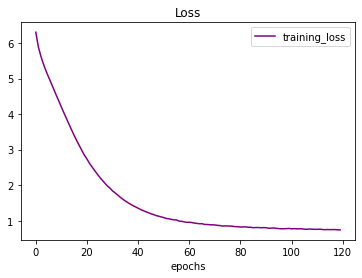

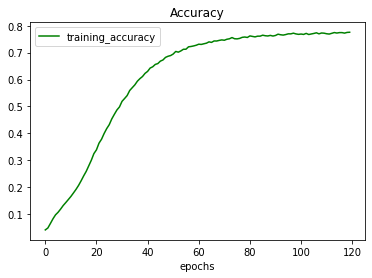

In [ ]:
def plot_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  accuracy = history.history["accuracy"]

  epochs = range(len(history.history["loss"]))  # how many epochs did we run for
  
  # Plot loss
  plt.plot(epochs, loss, label="training_loss", c="purple")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy", c="green")
  plt.title("Accuracy")
  plt.xlabel("epochs")
  plt.legend()

plot_curves(history)  

## Generating lyrics

In [ ]:
line = "When I stay close"
num_words = 50

while num_words:
  token_list = tokenizer.texts_to_sequences([line])[0]
  token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
  pred = model.predict_classes(token_list)
  next_word = ""
  for word, index in tokenizer.word_index.items():
    if index == pred:
      next_word = word
      break
  line += " " + next_word
  num_words -= 1      
print(line)


#### **Lyrics Generated:** *When I stay close to the touch of your hand in my arms once again be blue i'm down to acapulco and away more than gold to see before this love have as to you all the way on the world looking on with regret it it not for it for me to take*
